<h1><center>Performance of Conventional and Non-Conventional Algorithmic Strategies in Cryptocurrency Market</center></h1>

# Strategies Based on Moving Averages

The basic idea of moving averages usage for buying and selling signal generation is already decades old. Moving averages over different time windows are computed, and based on the relationship between different moving averages a market position is decided.

<img src="../images/SMA1.PNG" width="800" />

# Setup

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="darkgrid")

# Read the data from local drive

In [2]:
data = pd.HDFStore('data/BitcoinPriceData.h5', 'r')

dataSMA = data['BitcoinPriceData']

data.close()

print(dataSMA.info())
print('-'*20)
print('-'*20)
print(dataSMA.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2016-01-01 to 2021-06-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1980 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB
None
--------------------
--------------------
               Value
Date                
2021-05-29  35689.62
2021-05-30  34647.67
2021-05-31  35684.59
2021-06-01  37310.54
2021-06-02  36662.64


In [3]:
dataSMA.rename(columns={'Value':'price'}, inplace=True)

# Simple Moving Average (SMA)

The basic rule for trading with the SMA is that a security trading above its SMA is in an uptrend, while a security trading below its SMA is in a downtrend. So our strategy is to go long whenever the shorter SMA is above the longer one and vice versa.

> For this project, we will indicate a long position by 1 and a short position by –1.

In [4]:
# Shorter time window length.
shorter_window = 7
# Longer time window length.
longer_window = 21

# Simple moving averages.
dataSMA['SMA1'] = dataSMA['price'].rolling(shorter_window).mean()
dataSMA['SMA2'] = dataSMA['price'].rolling(longer_window).mean()

In [5]:
print(dataSMA.head())
print('-'*50)
print('-'*50)
print(dataSMA.tail())

             price  SMA1  SMA2
Date                          
2016-01-01  432.33   NaN   NaN
2016-01-02  433.94   NaN   NaN
2016-01-03  432.76   NaN   NaN
2016-01-04  433.00   NaN   NaN
2016-01-05  431.90   NaN   NaN
--------------------------------------------------
--------------------------------------------------
               price          SMA1          SMA2
Date                                            
2021-05-29  35689.62  37546.125714  44572.066190
2021-05-30  34647.67  37134.607143  43415.821429
2021-05-31  35684.59  37267.471429  42339.814762
2021-06-01  37310.54  37064.892857  41455.388095
2021-06-02  36662.64  36815.198571  40498.847143


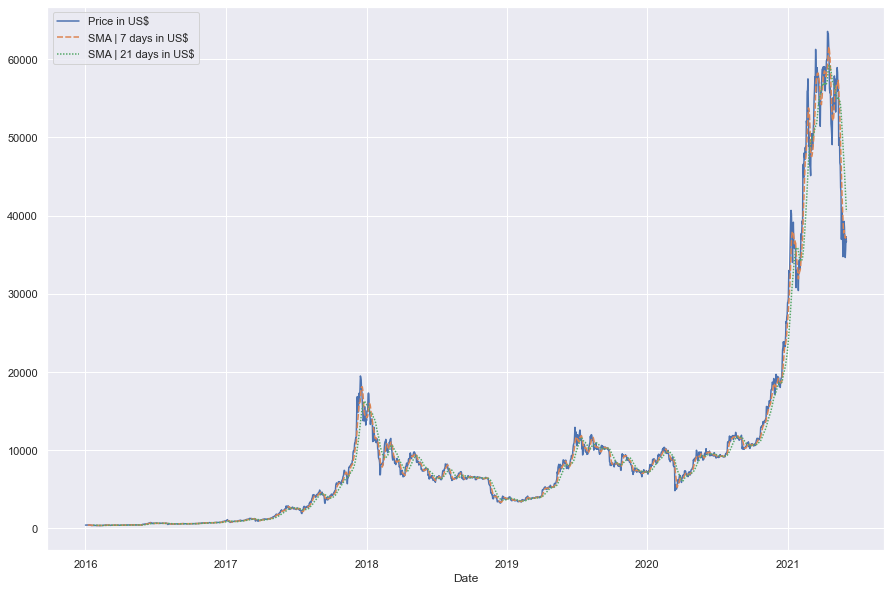

In [6]:
# Plot of price and SMA's over time.
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=dataSMA, legend=False)
ax.legend(['Price in US$', f'SMA | {shorter_window} days in US$', f'SMA | {longer_window} days in US$'])
plt.show()

Let's zoom in a little bit.

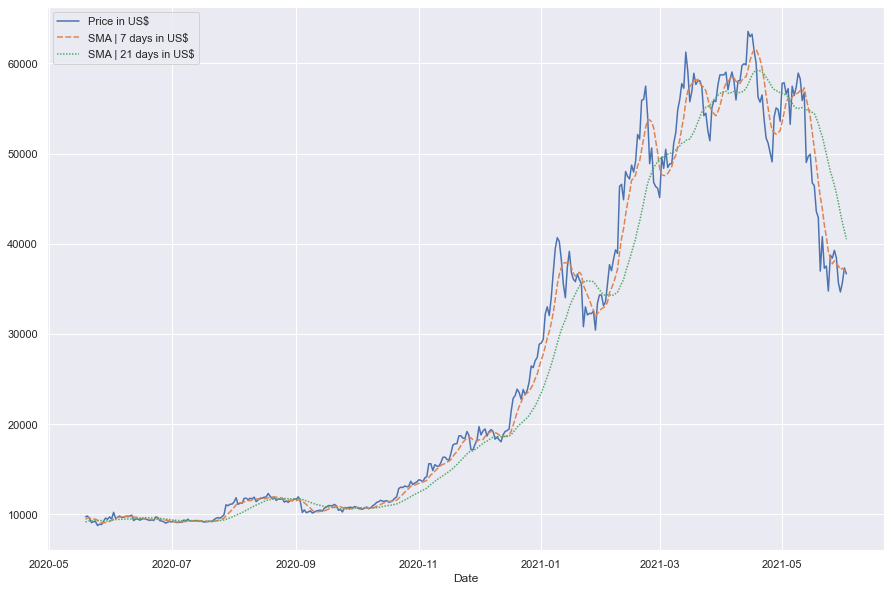

In [7]:
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=dataSMA[1600:], legend=False)
ax.legend(['Price in US$', f'SMA | {shorter_window} days in US$', f'SMA | {longer_window} days in US$'])
plt.show()

In [8]:
# Position over time based on the trading strategy.
dataSMA['position'] = np.where(dataSMA['SMA1'] > dataSMA['SMA2'] , 1, -1)
dataSMA.dropna(inplace=True)

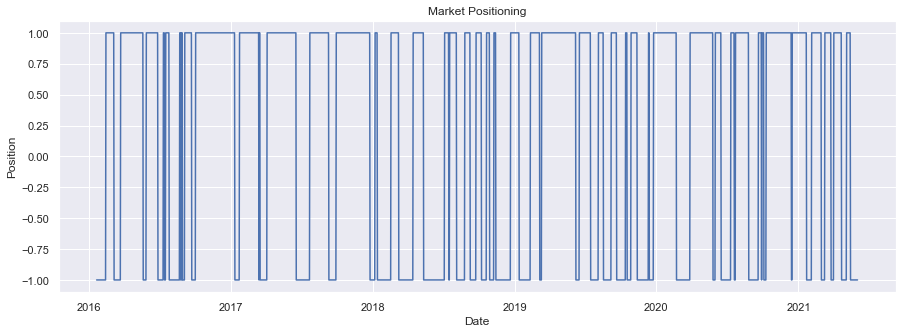

In [9]:
# Plot of market position over time.
plt.figure(figsize=(15, 5))
ax = sns.lineplot(data=dataSMA['position'])
ax.set(xlabel='Date', ylabel='Position', title='Market Positioning')
plt.show()

In [10]:
# Returns (log scale).
dataSMA['returns'] = np.log(dataSMA['price'] / dataSMA['price'].shift(1))

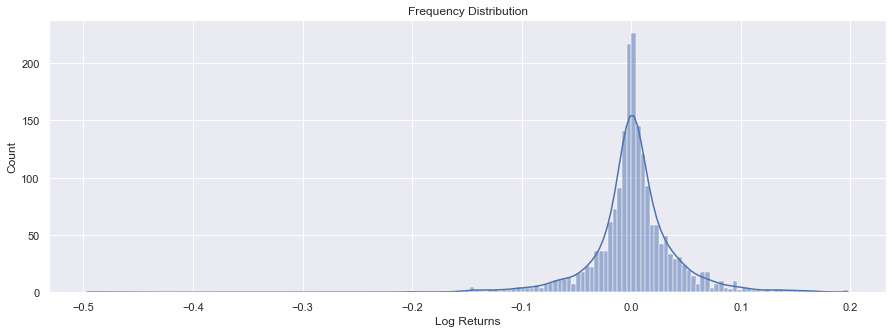

In [11]:
# Plot of log returns distribution.
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=dataSMA['returns'], kde=True)
ax.set(xlabel='Log Returns', ylabel='Count', title='Frequency Distribution')
plt.show()

Gaussian - nice!

In [12]:
# Strategy based returns (log scale).
dataSMA['strategy'] = dataSMA['position'].shift(1)*dataSMA['returns']

In [13]:
# Final returns based on the passive benchmark investment and strategy (log scale).
log_returns = dataSMA[['returns', 'strategy']].sum()
print(log_returns)

returns     4.468426
strategy    5.334988
dtype: float64


In [14]:
# Final returns based on the passive benchmark investment and strategy.
returns = log_returns.apply(np.exp)
print(returns)

returns      87.219317
strategy    207.470267
dtype: float64


In [15]:
# Cumulative returns over time based on the passive benchmark investment and strategy (regular scale).
gross_performance_SMA = dataSMA[['returns', 'strategy']].cumsum().apply(np.exp)

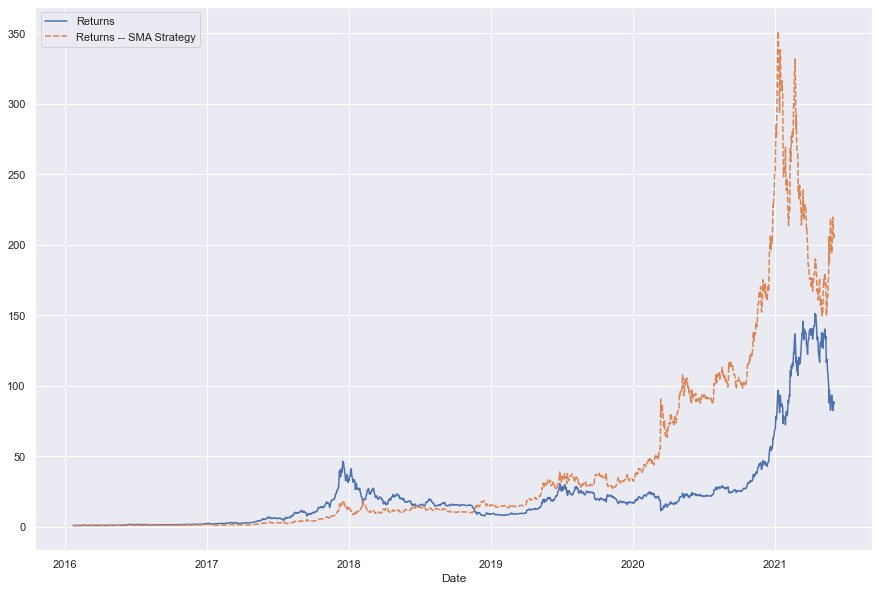

In [16]:
# Plot of cumulative returns based on the passive benchmark investment and strategy over time (regular scale).
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=gross_performance_SMA, legend=False)
ax.legend(['Returns', 'Returns -- SMA Strategy'])
plt.show()

In [17]:
# Annualized mean return in both log and regular space.
annual_mean_return_log = dataSMA[['returns', 'strategy']].mean() * 252
annual_mean_return = np.exp(dataSMA[['returns', 'strategy']].mean() * 252) - 1

print(annual_mean_return_log)
print('-'*20)
print('-'*20)
print(annual_mean_return)

returns     0.574805
strategy    0.686277
dtype: float64
--------------------
--------------------
returns     0.776784
strategy    0.986307
dtype: float64


In [18]:
# Annualized standard deviation in both log and regular space.
annual_std_return_log = dataSMA[['returns' , 'strategy']].std() * 252 ** 0.5
annual_std_return = (np.exp(dataSMA[['returns' , 'strategy']]) - 1).std() * 252 ** 0.5

print(annual_std_return_log)
print('-'*20)
print('-'*20)
print(annual_std_return)

returns     0.641070
strategy    0.640634
dtype: float64
--------------------
--------------------
returns     0.634820
strategy    0.662039
dtype: float64


In [19]:
dataSMA['cumret'] = dataSMA['strategy'].cumsum().apply(np.exp)

# Cumulative maximum gross performance.
dataSMA['cummax'] = dataSMA['cumret'].cummax()

dataSMA.dropna(inplace=True)

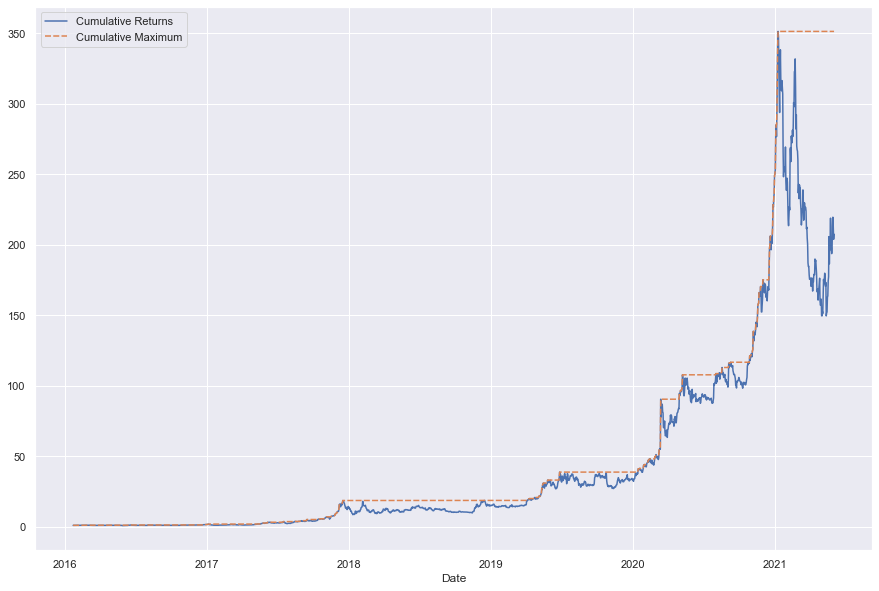

In [20]:
# Plot of cumulative returns and cumulative maximum based on the strategy over time.
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=dataSMA[['cumret', 'cummax']], legend=False)
ax.legend(['Cumulative Returns', 'Cumulative Maximum'])
plt.show()

In [21]:
# Drawdowns.
drawdown_SMA = dataSMA['cummax'] - dataSMA['cumret']

# Maximum drawdown.
print(drawdown_SMA.max())

201.71629632095727


In [22]:
# Drawdown periods.
temp_SMA = drawdown_SMA[drawdown_SMA == 0]
periods_SMA = (temp_SMA.index[1:].to_pydatetime() - temp_SMA.index[:-1].to_pydatetime())

# Maximum drawdown period.
print(periods_SMA.max())

364 days, 0:00:00


## Summary

The advantage of the SMA's is that the indicator is smoothed and, less prone to a lot of false signals.

The SMA's weakness is that it is slower to respond to rapid price changes that often occur at market reversal points. The SMA is often favored by traders or analysts operating on longer time frames, such as daily or weekly charts.

In contrast to the SMA's, the exponential moving averages (EMA's) is computed in a manner that gives greater weighting to the most recent days. That is, the EMA takes a simple moving average and uses a multiplier so that more recent data is assigned more importance. The concurrent disadvantage of the greater sensitivity of the EMA is that it is more vulnerable to false signals and getting whipsawed back and forth. The EMA is commonly used by intraday traders who are trading on shorter time frames.

Since neither average is inherently superior, the question of which one to use is typically settled by the user's trading style or analytical frame of reference.

### References

1. [Simple Moving Average (SMA) by Adam Hayes](https://www.investopedia.com/terms/s/sma.asp#:~:text=Key%20Takeaways-,A%20simple%20moving%20average%20(SMA)%20calculates%20the%20average%20of%20a,a%20bull%20or%20bear%20trend.)
2. [Advantages and Disadvantages of the Simple Moving Average (SMA)? by J.B. Maverick](https://www.investopedia.com/ask/answers/013015/what-are-main-advantages-and-disadvantages-using-simple-moving-average-sma.asp#:~:text=The%20advantage%20of%20the%20simple,might%20be%20old%20or%20stale.)